In [17]:
import numpy as np
import json
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import pandas as pd

In [131]:
directory = 'CACHED_DATA/results/LFP/'
dict_results =[]
for i, file in enumerate(tqdm(os.listdir(directory))):
    if file.endswith('CV.json'):
        with open(directory+file, 'rb') as f:
            dict_results.append(json.load(f))
#     break
# returns JSON object as 
# a dictionary


100%|██████████| 20/20 [00:00<00:00, 21103.42it/s]


In [132]:
df = pd.DataFrame(dict_results).sort_values(['prediction_window_size'], ascending=[True])
df

,input_window_size,prediction_window_size,mean_test_slope_MAE,std_test_slope_MAE,mean_test_dc_RMSE,std_test_dc_RMSE
3,10,10,0.113639,0.012061,0.000642,0.000171
6,100,10,0.169894,0.021143,0.001985,0.001208
8,50,10,0.102462,0.031637,0.000911,0.000300
2,50,50,0.276635,0.036857,0.002763,0.001073
11,10,50,0.178143,0.016958,0.001901,0.000558
13,100,50,0.368108,0.078601,0.011035,0.001394
4,10,100,0.252715,0.021962,0.004022,0.001288
9,100,100,0.359845,0.046208,0.020210,0.010697
10,50,100,0.311918,0.037113,0.005078,0.001330
5,100,150,0.482640,0.070898,0.020582,0.009087


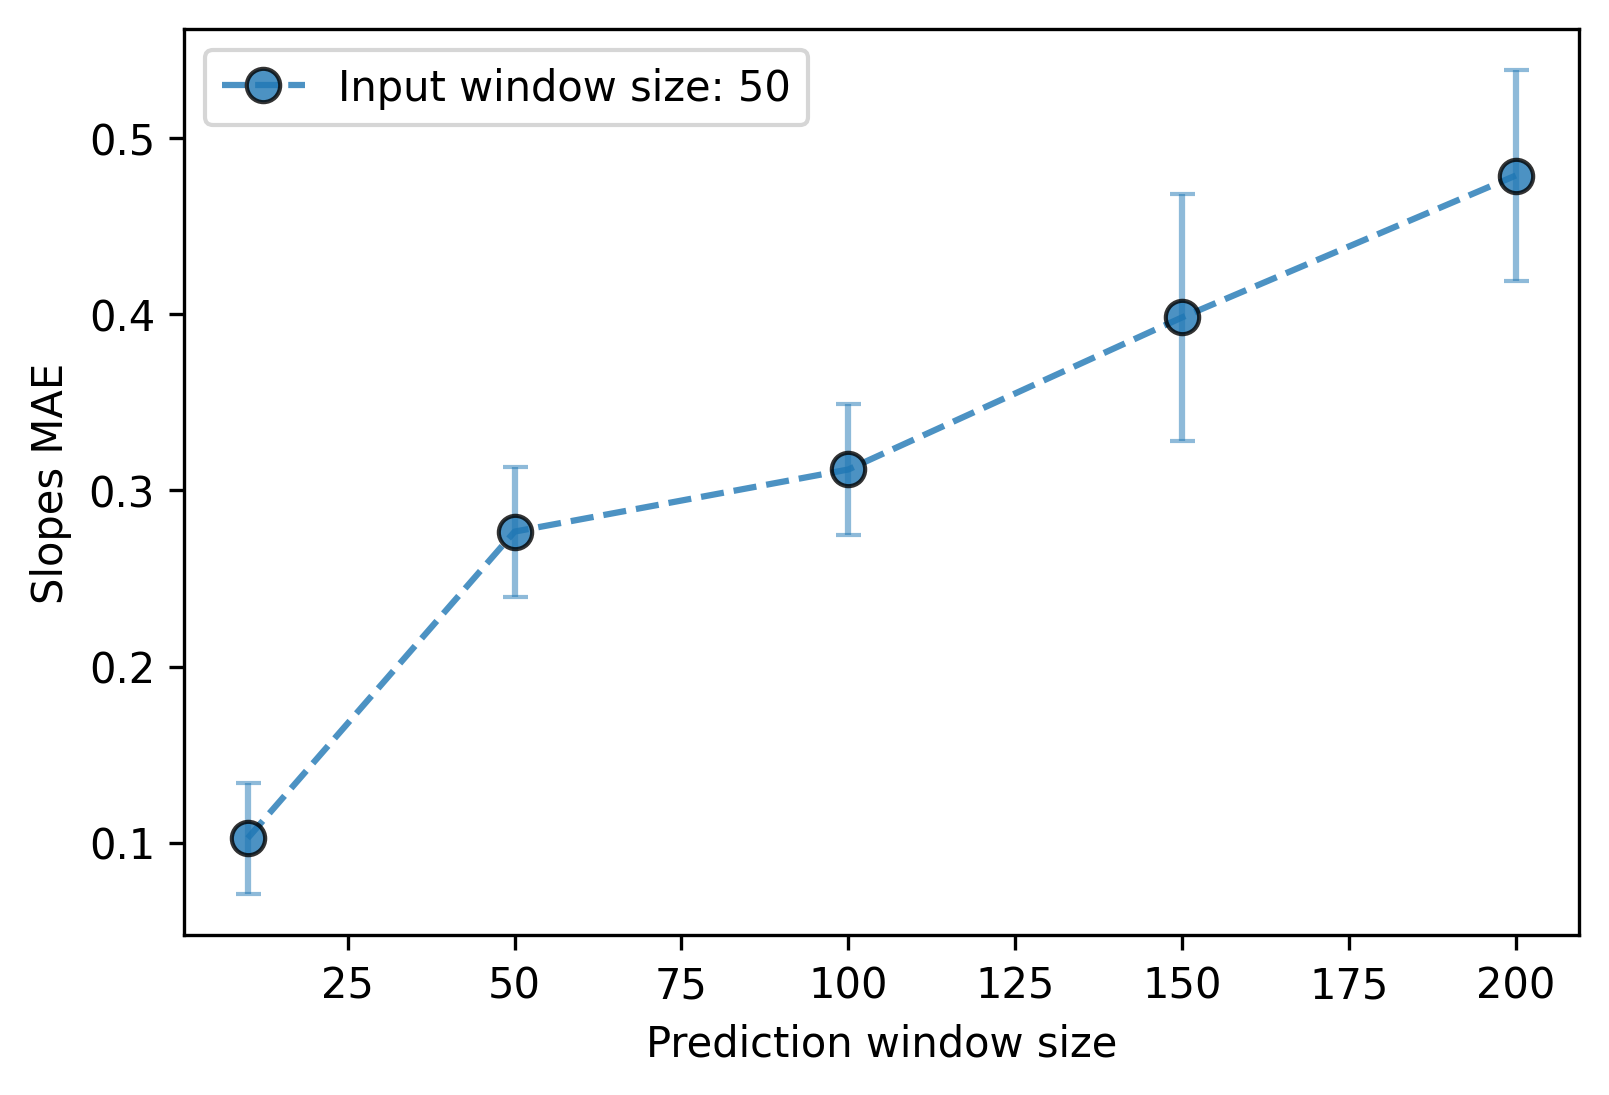

In [147]:
plt.figure(dpi=300, facecolor='white')
# 
for i,p in enumerate(np.unique(df['input_window_size'])):
    if p == 50:
        i = 0
        same_input_size_df = df.loc[df['input_window_size']== p]
        plt.errorbar(same_input_size_df['prediction_window_size'], same_input_size_df['mean_test_slope_MAE'],
                     yerr=same_input_size_df['std_test_slope_MAE'],
                    capsize=3, linestyle='', alpha=0.5, color=f'C{i}')
        plt.plot(same_input_size_df['prediction_window_size'], same_input_size_df['mean_test_slope_MAE'], marker='o',
             markerfacecolor=f'C{i}', linestyle='--', markersize=8, markeredgewidth=1, 
                 markeredgecolor='k',  label=f'Input window size: {p}', alpha=0.8)
plt.xlabel('Prediction window size')
plt.ylabel('Slopes MAE')
# plt.title('Input window size = 50')
plt.legend()

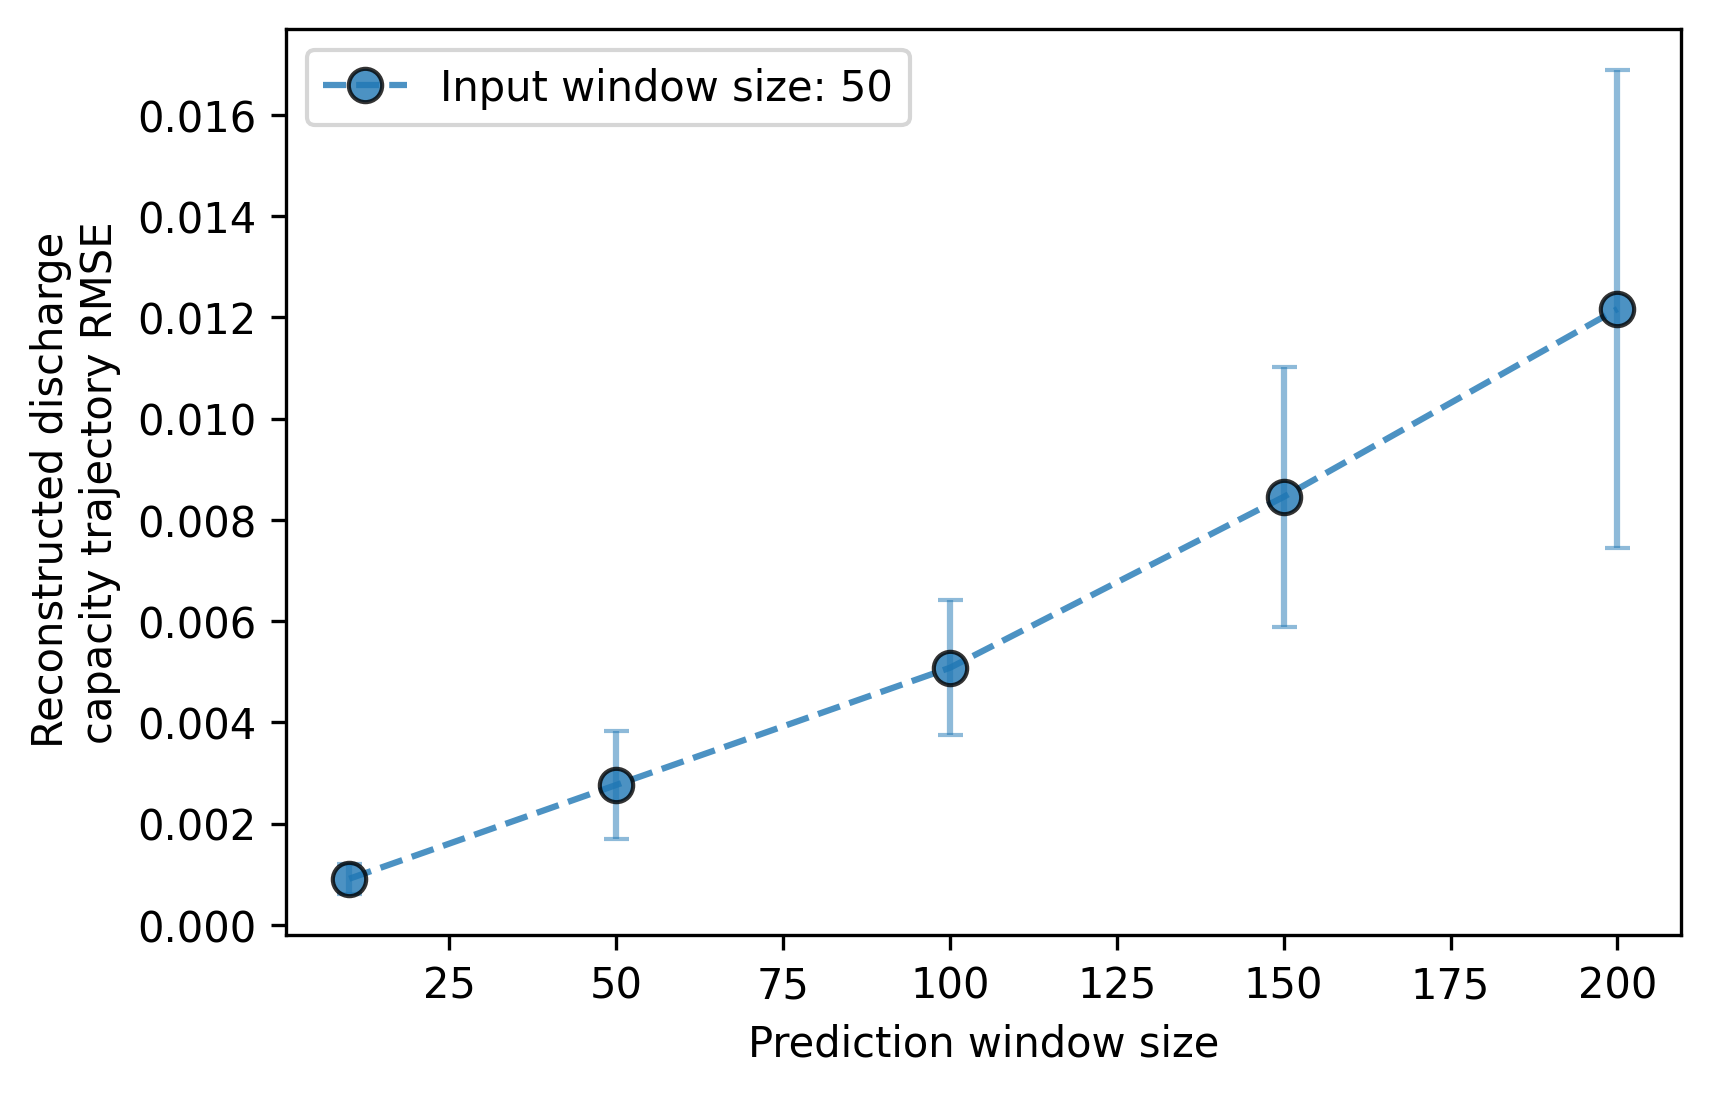

In [148]:
plt.figure(dpi=300, facecolor='white')
plt.xlabel('Prediction window size')
plt.ylabel('Reconstructed discharge \ncapacity trajectory RMSE')
for i,p in enumerate(np.unique(df['input_window_size'])):
    if p ==50:
        i = 0
        same_input_size_df = df.loc[df['input_window_size']== p]
        plt.errorbar(same_input_size_df['prediction_window_size'], same_input_size_df['mean_test_dc_RMSE'],
                     yerr=same_input_size_df['std_test_dc_RMSE'],
                    capsize=3, linestyle='', alpha=0.5, color=f'C{i}')

        plt.plot(same_input_size_df['prediction_window_size'], same_input_size_df['mean_test_dc_RMSE'],  marker='o',
                 markerfacecolor=f'C{i}', linestyle='--', markersize=8,
                 markeredgewidth=1, markeredgecolor='k', label=f'Input window size: {p}', alpha=0.8)

# plt.title('Input window size = 50')
plt.legend()

In [90]:
dict_results[0]

{'input_window_size': 50,
 'prediction_window_size': 200,
 'mean_test_slope_MAE': 0.47887769937515257,
 'std_test_slope_MAE': 0.059726280618242464,
 'mean_test_dc_RMSE': 0.012161978060468568,
 'std_test_dc_RMSE': 0.004713245375250755}

In [143]:
test_cell_number = 5
input_window_size = 10
output_window_size = 100
print(f"ffmpeg -framerate 3 -i media/LFP/img/discharge_curve_in_{input_window_size}_out_{output_window_size}_window_test_{test_cell_number}_%04d.png -c:v h264 -crf 14 -c:v libx264 -movflags +faststart -vf format=yuv420p -maxrate 50M -tune animation -bufsize 1MB -y media/LFP/mp4/discharge_curve_in_{input_window_size}_out_{output_window_size}_window_test_{test_cell_number}.mp4")

ffmpeg -framerate 3 -i media/LFP/img/discharge_curve_in_10_out_100_window_test_5_%04d.png -c:v h264 -crf 14 -c:v libx264 -movflags +faststart -vf format=yuv420p -maxrate 50M -tune animation -bufsize 1MB -y media/LFP/mp4/discharge_curve_in_10_out_100_window_test_5.mp4


In [141]:
print(f'ffmpeg -i media/LFP/mp4/discharge_curve_in_{input_window_size}_out_{output_window_size}_window_test_{test_cell_number}.mp4 -framerate 1 -vf "fps=24, scale=2000:-1:flags=lanczos" -loop 0 -y media/LFP/gif/discharge_curve_in_{input_window_size}_out_{output_window_size}_window_test_{test_cell_number}.gif')

ffmpeg -i media/LFP/mp4/discharge_curve_in_10_out_100_window_test_5.mp4 -framerate 1 -vf "fps=24, scale=2000:-1:flags=lanczos" -loop 0 -y media/LFP/gif/discharge_curve_in_10_out_100_window_test_5.gif


In [ ]:
ffmpeg -framerate 5 -i media/LFP/img/discharge_curve_in_10_out_100_window_test_5_%04d.png -c:v h264 -crf 14 -c:v libx264 -movflags +faststart -vf format=yuv420p -maxrate 50M -tune animation -bufsize 1MB -y media/LFP/mp4/discharge_curve_in_10_out_100_window_test_5.mp4